# 미세 튜닝 모델 검증

In [3]:
import torch
import requests
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import transformers

In [4]:
# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
torch_dtype = torch.float16 if device == "cuda" else torch.float32

In [5]:
print(device)

mps


# Text2Image

In [6]:
import torch
from diffusers import StableDiffusionPipeline, UNet2DConditionModel

# model_path = "/Volumes/jmoh2T/models/sd-foodai-model-ko"
# unet = UNet2DConditionModel.from_pretrained(model_path + "/checkpoint-50000/unet", torch_dtype=torch_dtype)

# initial_pipeline_path = "/Volumes/jmoh2T/models/initial-ai-menu-stable-diffusion-v1-4"
# pipe = StableDiffusionPipeline.from_pretrained(initial_pipeline_path, unet=unet, torch_dtype=torch_dtype)

trained_pipeline_path = "/Volumes/jmoh2T/models/ai-menu-model-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(trained_pipeline_path, torch_dtype=torch_dtype)

pipe.to(device)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.29.2",
  "_name_or_path": "/Volumes/jmoh2T/models/ai-menu-model-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [7]:
# Load the pipeline
# model_id_or_path = "CompVis/stable-diffusion-v1-4"
model_id_or_path = "Bingsu/my-korean-stable-diffusion-v1-5"
original_pipe = StableDiffusionPipeline.from_pretrained(model_id_or_path, torch_dtype=torch_dtype).to(device)

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /Users/jangmin/.cache/huggingface/hub/models--Bingsu--my-korean-stable-diffusion-v1-5/snapshots/ff96e5b30c1732537c97b52e1b6e3ec63b95c121/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [11]:
# prompt = "Seafood hot pot, as if it's being served in a Korean restaurant"
# prompt = "Pajeon (green onion pancake), Korean style"
# prompt = "짜장면"
# prompt = "Songpyeon (half-moon shaped rice cake), Korean style, photographed from directly above"
# prompt = 'Small clams, steamed, photographed from directly above'
# prompt = "Roasted seaweed, Korean style, photographed from directly above"
# prompt = 'Tteokbokki (spicy rice cakes) with a half of boiled egg on it, which is Korean street food, photographed from directly above'
prompt = "찰옥수수"
# prompt = "Ramyeon (Korean instant noodles), photographed from directly above"
# prompt = "Kimchi soup, photographed from directly above, without chopsticks"
# prompt = "Naengmyeon (cold noodles) with a cup of coffe at left side, photographed from directly above"
# prompt = "Korean favoriate food called 'Chicken feet' with hot source, unurgly, photographed from directly above" # 혐오
# 
# prompt = "Spicy pork bulgogi, a food which is photographed from directly above"

  0%|          | 0/35 [00:00<?, ?it/s]

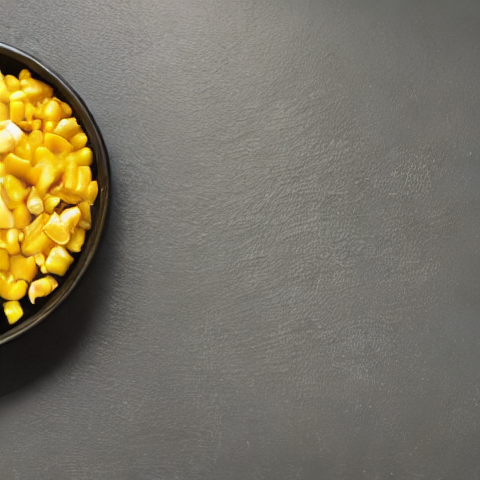

In [12]:
generator = torch.Generator(device=device).manual_seed(42)
pipe(prompt=prompt,
    # negative_prompt="chinese food", # Negative prompt to avoid
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]

  0%|          | 0/35 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


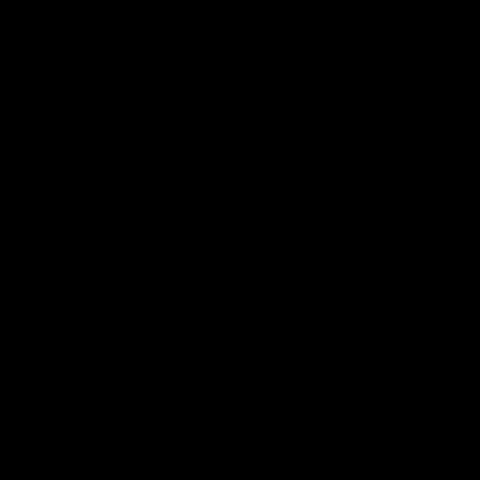

In [10]:
generator = torch.Generator(device=device).manual_seed(42)
original_pipe(prompt=prompt, 
    height=480, width=480,     # Specify the image size
    guidance_scale=8,          # How strongly to follow the prompt
    num_inference_steps=35,    # How many steps to take
    generator=generator        # Fixed random seed
    ).images[0]

# 파이프라인 저장

In [ ]:
# pipe.save_pretrained("/Volumes/jmoh2T/models/ai-menu-model-v1-4")